In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

In [2]:
curdir = "final_dataset/yaleB/"
X = np.zeros((2415-38, 32256))
Y = np.zeros(2415-38)

#testing purposes###############
Xtest = np.zeros((38, 32256))
Ytest = np.zeros(38)
####################

j = 0 ##################################
i = 0
count1 = 0
count2 = []
avgFaces = []
for subdir in os.listdir(curdir):
    person = os.path.join(curdir,subdir)
    count = 0
    avgFace = []
    for imagefile in os.listdir(person):
        #checking if imagefile, also removing ambient image
        
        ##############################
        if((imagefile.endswith("P00A-005E-10.pgm"))):
            #image location
            imageloc = os.path.join(person, imagefile)
            #loaded image
            image = plt.imread(imageloc)
            
            #which person is loaded in, not used yet
            curperson = int(subdir[5:])-1
            # print(curperson)
            if(curperson>13):
                curperson -= 1
                
            Xtest[j,:] = image.flatten()
            Ytest[j] = curperson
            j+=1 
            continue
        #####################################
        if(imagefile.endswith(".pgm")):
            # print(imagefile)
            count +=1
            #image location
            imageloc = os.path.join(person, imagefile)
            #loaded image
            image = plt.imread(imageloc)
            
            #which person is loaded in, not used yet
            curperson = int(subdir[5:])-1
            # print(curperson)
            if(curperson>13):
                curperson -= 1
            X[i,:] = image.flatten()
            avgFace.append(X[i,:])
            Y[i] = curperson
            i+=1
    avgFace = np.sum(np.array(avgFace),axis = 0)/count
    avgFaces.append((avgFace,curperson))
    count2.append(count)
    count1 += count
    # print(count)
print(count1)

2377


(2377, 32256)


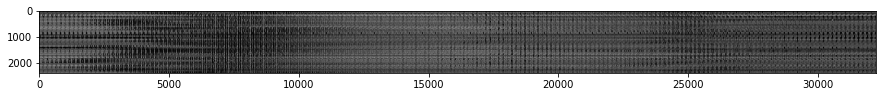

In [3]:
#vector X
plt.figure(figsize=(15,15))
plt.imshow(X,cmap='gray')
print(X.shape)

192 168


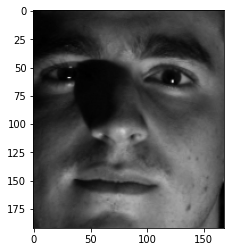

In [6]:
#sample image
img = plt.imread(imageloc)
h,w = img.shape
plt.imshow(img,cmap='gray')
print(h,w)

In [7]:
#Average vector
aV = np.zeros((38, 32256))
for i in range(len(avgFaces)):
    aV[avgFaces[i][1]] = avgFaces[i][0]

In [8]:
#sort the set
indices = np.argsort(Y)
print(indices)
Ytrain = Y[indices]
print(Ytrain)
Xtrain = X[indices,:]
print((Xtrain))

[ 282  283  284 ... 2342 2344 2376]
[ 0.  0.  0. ... 37. 37. 37.]
[[  4.   4.   4. ...  92. 111. 107.]
 [109. 108. 115. ...   5.   6.   5.]
 [ 71.  83.  90. ...   4.   5.   7.]
 ...
 [121. 119. 120. ...   0.   0.   0.]
 [127. 128. 136. ...   1.   1.   2.]
 [  4.   5.   6. ...   1.   1.   1.]]


In [9]:
u, ind = np.unique(Y,return_inverse=True)

In [10]:
#original order
print(str(ind))
checker = np.arange(0, 38, 1)
for i in range(Y.shape[0]):
    if checker[int(Y[i])] == 0:
        continue
    else:
        checker[int(Y[i])] = 0
        print(Y[i])

[25 25 25 ... 37 37 37]
25.0
28.0
12.0
20.0
11.0
5.0
15.0
23.0
2.0
10.0
17.0
19.0
26.0
33.0
32.0
30.0
14.0
18.0
3.0
29.0
13.0
4.0
7.0
8.0
21.0
27.0
35.0
9.0
22.0
1.0
16.0
6.0
24.0
34.0
31.0
36.0
37.0


In [11]:
X_t = Xtrain
A = X_t.T
mean_imgs = np.reshape(A.mean(axis = 1),(32256,1))
A = A - mean_imgs
print(A.shape)

(32256, 2377)


In [12]:
print(A.mean(axis = 1).shape)
print(aV.shape)

(32256,)
(38, 32256)


In [13]:
aV = aV - mean_imgs.T

In [14]:
#we use A.T @ A and not A @ A.T for lesser computational complexity
U,D,Vt = np.linalg.svd(A.T @ A)
V = Vt.T
evects = A @ V
norm = np.linalg.norm(evects,axis=0)
evects = evects / norm

In [15]:
#eigenvectors
print(evects)
print(evects.shape)

[[ 0.00254187 -0.00749923 -0.00221469 ... -0.00426879 -0.00499514
  -0.00425629]
 [ 0.00246804 -0.00761651 -0.00190839 ... -0.00249182 -0.00541058
   0.00519129]
 [ 0.00231151 -0.00771143 -0.00161881 ... -0.00153863  0.00111507
   0.00052462]
 ...
 [-0.00253187  0.00434242 -0.0057332  ... -0.00349727 -0.00807898
  -0.00179757]
 [-0.00234398  0.0042338  -0.00560569 ... -0.00077041 -0.00945867
   0.00139276]
 [-0.00224071  0.00420553 -0.0055224  ... -0.00374815 -0.00602249
   0.01818701]]
(32256, 2377)


In [16]:
def reducedA(k,eV,A):
    Areduced = (eV[:,:k].T @ A)
    Arecovered = (eV[:,:k] @ Areduced)
    return Arecovered

In [18]:
# reduction in number of components
A1 = reducedA(5,evects,A)
A2 = reducedA(10,evects,A)

In [19]:
A3 = reducedA(100,evects,A)
A4 = reducedA(1000,evects,A)

2 examples of reconstruction using different number of eigenfaces taken


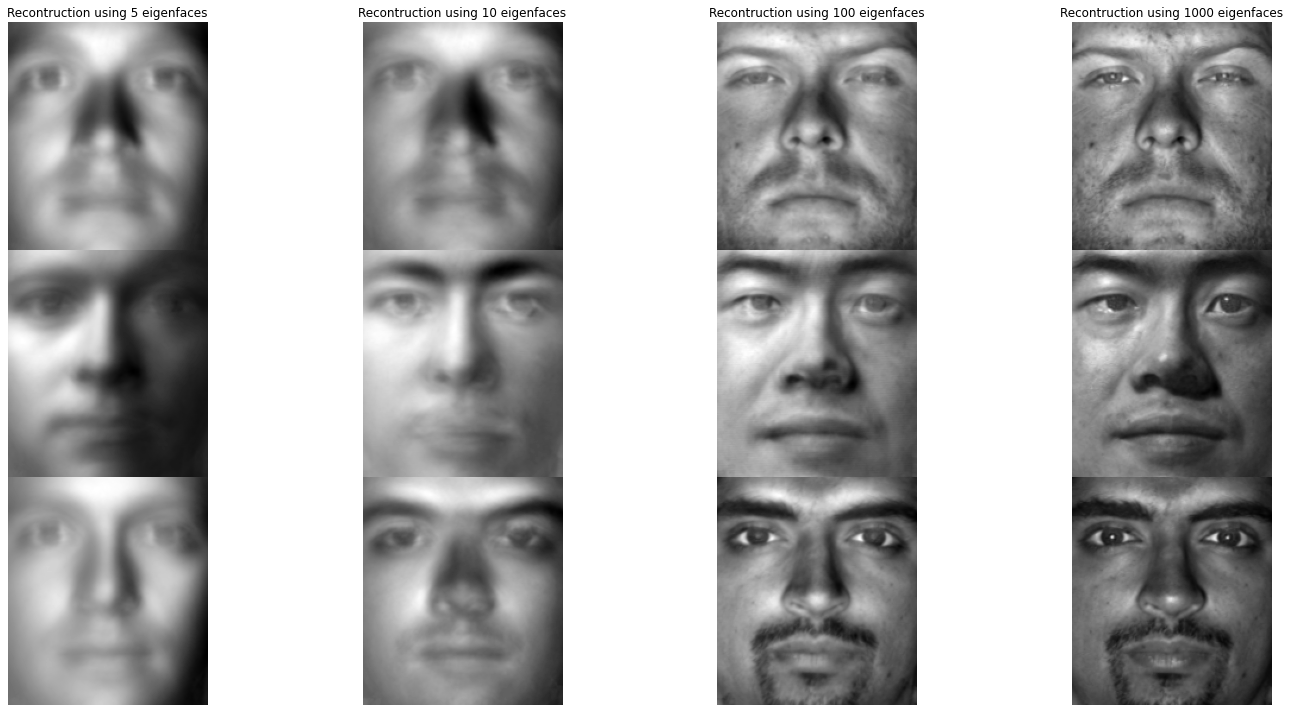

In [20]:
print("2 examples of reconstruction using different number of eigenfaces taken")
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(3, 4, 1)
plt.imshow(A1[:,20].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 5 eigenfaces")
plt.axis("off")
fig.add_subplot(3, 4, 2)
plt.imshow(A2[:,20].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 10 eigenfaces")
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 3)
plt.imshow(A3[:,20].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 100 eigenfaces")
plt.axis("off")
fig.add_subplot(3, 4, 4)
plt.imshow(A4[:,20].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 1000 eigenfaces")
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 5)
plt.imshow(A1[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 6)
plt.imshow(A2[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 7)
plt.imshow(A3[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 8)
plt.imshow(A4[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 9)
plt.imshow(A1[:,540].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 10)
plt.imshow(A2[:,540].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 11)
plt.imshow(A3[:,540].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 12)
plt.imshow(A4[:,540].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis("off")
plt.show()

In [21]:
def which_trained_face(test_img, espace, mean_face, X_train,Y_train):
    smallest_norm = None
    person = None
    out = None
    test_img = np.reshape(test_img,(32256, 1))
    test_img = test_img - mean_face
    
    for i in range(X_train.shape[0]):
        cur_img = np.reshape(X_train[i],(32256, 1)) - mean_face
        reduced_img = (espace.T @ cur_img)
        test_img_espace = espace.T @ test_img
        
        compare = reduced_img - test_img_espace
        norm = np.linalg.norm(compare)
        
        if smallest_norm == None:
            smallest_norm = norm
            person = Y_train[i]
        if smallest_norm > norm:
            smallest_norm = norm
            person = Y_train[i]
            out = cur_img
    return smallest_norm,person,out

In [22]:
def which_face_from_training(test_img, espace, mean_face, X_train,Y_train,actual):
    smallest_norm = None
    person = None
    
    out = None
    test_img = np.reshape(test_img,(32256, 1))
    test_img = test_img - mean_face
    
    for i in range(X_train.shape[0]):
        if i!=actual:
            cur_img = np.reshape(X_train[i],(32256, 1)) - mean_face
            reduced_img = (espace.T @ cur_img)
            test_img_espace = espace.T @ test_img

            compare = reduced_img - test_img_espace
            norm = np.linalg.norm(compare)

            if smallest_norm == None:
                smallest_norm = norm
                person = Y_train[i]
            if smallest_norm > norm:
                smallest_norm = norm
                person = Y_train[i]
                out = cur_img
    return smallest_norm,person,out

Text(0.5, 1.0, 'Prediction Class no.11.0')

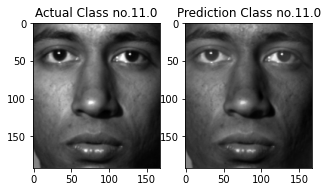

In [23]:
sN1,per1,out1 = which_face_from_training(Xtrain[730], evects[:,0:10], mean_imgs, Xtrain,Ytrain,730)
fig = plt.figure(figsize=(5, 40))
fig.add_subplot(1, 2, 1)
plt.imshow(Xtrain[730].reshape((h,w)),cmap='gray')
plt.title(f"Actual Class no.{Ytrain[730]}")
fig.add_subplot(1, 2, 2)
plt.imshow(out1.reshape((h,w)),cmap='gray')
plt.title(f"Prediction Class no.{per1}")

In [24]:
sN_mainData = []
per = []
out = []
for i in range(len(Xtest)):
    sN1,per1,out1 = which_trained_face(Xtest[i], evects[:,0:10], mean_imgs, Xtrain,Ytrain)
    sN_mainData.append(sN1)
    per.append(per1)
    out.append(out1)

In [25]:
count = 0
for i in range(38):
    if(per[i]!=Ytest[i]):
        count+= 1
        print(f"Image belonging to class {i+1} is wrongly guessed")
    else:
        print(f"Image belonging to class {i+1} is correctly guessed")
print(f"\nNumber of incorrect guesses amongst the Yale = {count}")

Image belonging to class 1 is correctly guessed
Image belonging to class 2 is correctly guessed
Image belonging to class 3 is correctly guessed
Image belonging to class 4 is correctly guessed
Image belonging to class 5 is wrongly guessed
Image belonging to class 6 is correctly guessed
Image belonging to class 7 is wrongly guessed
Image belonging to class 8 is wrongly guessed
Image belonging to class 9 is correctly guessed
Image belonging to class 10 is correctly guessed
Image belonging to class 11 is correctly guessed
Image belonging to class 12 is correctly guessed
Image belonging to class 13 is correctly guessed
Image belonging to class 14 is correctly guessed
Image belonging to class 15 is correctly guessed
Image belonging to class 16 is correctly guessed
Image belonging to class 17 is correctly guessed
Image belonging to class 18 is correctly guessed
Image belonging to class 19 is correctly guessed
Image belonging to class 20 is correctly guessed
Image belonging to class 21 is wron

/home/wandra/Documents/SEM-5/DIP/DIP/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


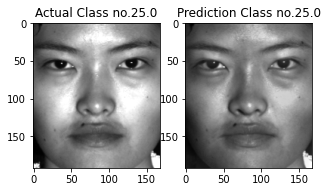

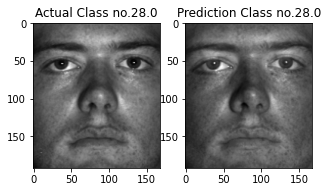

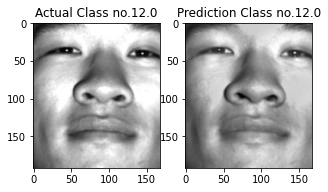

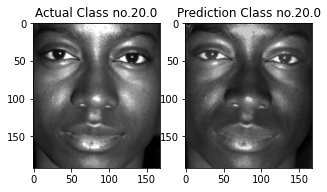

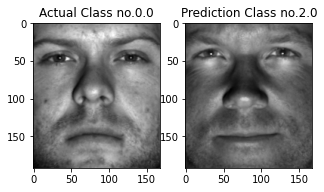

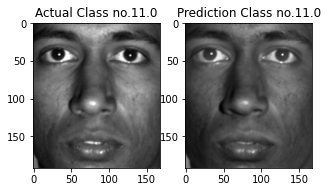

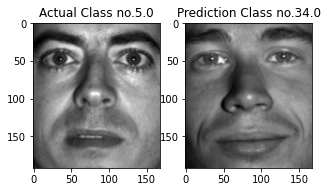

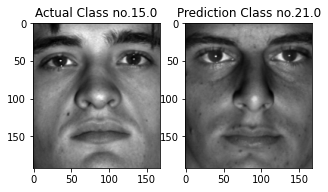

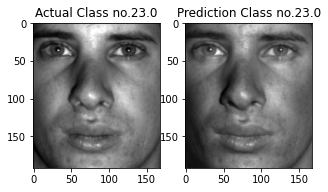

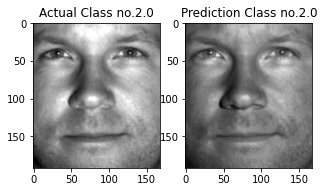

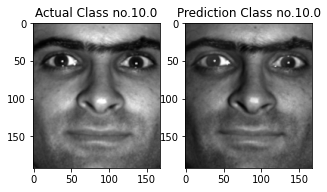

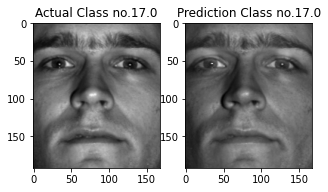

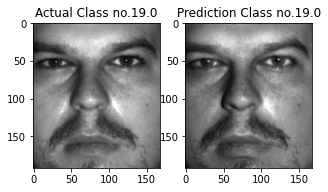

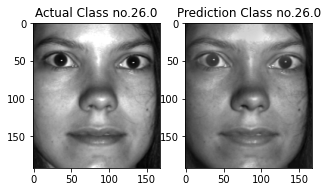

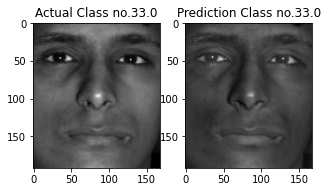

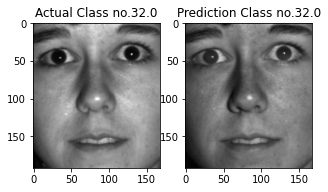

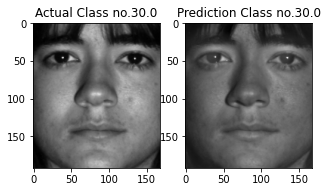

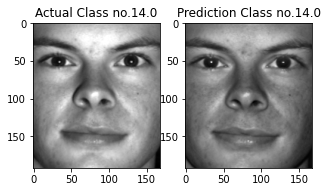

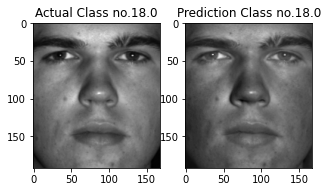

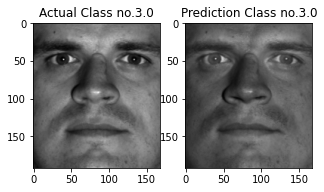

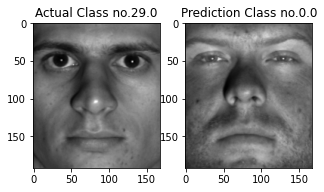

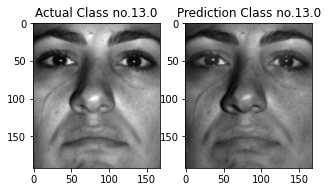

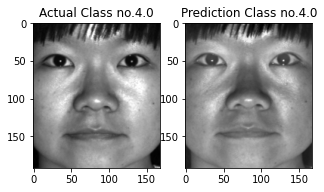

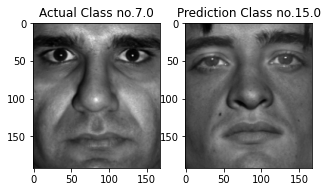

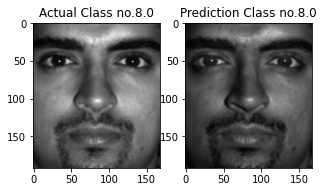

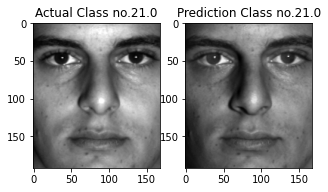

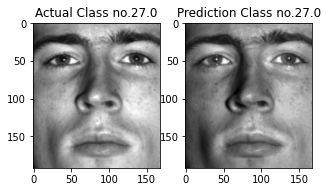

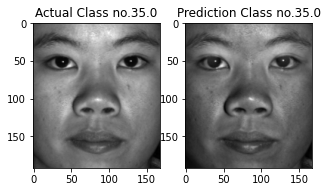

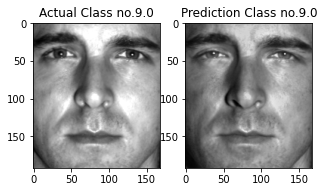

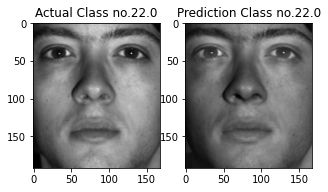

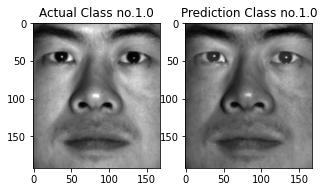

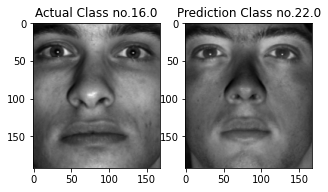

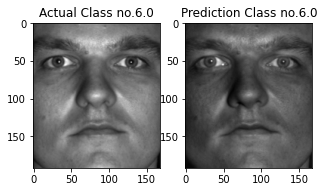

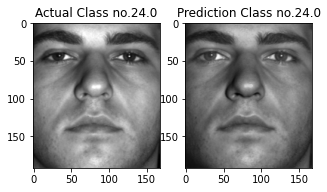

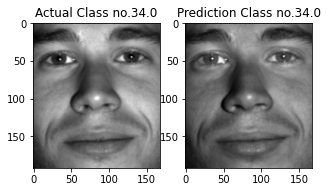

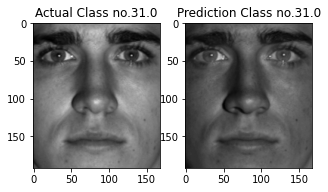

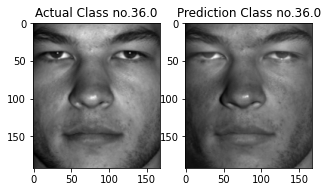

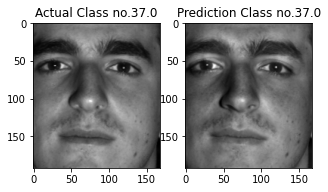

In [26]:
for i in range(38):
    fig = plt.figure(figsize=(5, 40))
    fig.add_subplot(1, 2, 1)
    plt.imshow(Xtest[i].reshape((h,w)),cmap='gray')
    plt.title(f"Actual Class no.{Ytest[i]}")
    fig.add_subplot(1, 2, 2)
    plt.imshow(out[i].reshape((h,w)),cmap='gray')
    plt.title(f"Prediction Class no.{per[i]}")

In [27]:
for i in range(len(sN_mainData)):
    print(f"Norm during testing for class {i} = {sN_mainData[i]}")

Norm during testing for class 0 = 2397.2508313255157
Norm during testing for class 1 = 1532.906950925167
Norm during testing for class 2 = 2359.6213241787395
Norm during testing for class 3 = 1925.0901227957938
Norm during testing for class 4 = 1830.3175727218363
Norm during testing for class 5 = 1693.8681341364759
Norm during testing for class 6 = 2093.248138753928
Norm during testing for class 7 = 2023.5921264363908
Norm during testing for class 8 = 2111.6598084141738
Norm during testing for class 9 = 2705.46595801861
Norm during testing for class 10 = 1603.3402747706837
Norm during testing for class 11 = 1817.3939550808977
Norm during testing for class 12 = 2001.9003601905808
Norm during testing for class 13 = 2191.2468539247197
Norm during testing for class 14 = 1313.039186187722
Norm during testing for class 15 = 2216.4759517281414
Norm during testing for class 16 = 1830.5055523526014
Norm during testing for class 17 = 3025.108509172214
Norm during testing for class 18 = 1583.0163

In [28]:
print(f"Final accuracy of test images = {100-(count/38)*100}%")

Final accuracy of test images = 84.21052631578948%


From the above norm based on observation, an image is said to be part of the training set only if the norm is below a threshold of 3500